In [8]:
df.columns


Index(['CustomerID', 'Date', 'Product', 'TotalAmount'], dtype='object')

In [5]:
import pandas as pd
df = pd.read_csv('../data/sales_data.csv')
df.head()


,CustomerID,Date,Product,TotalAmount
0,C001,2024-01-05,Coffee,120
1,C001,2024-01-20,Cake,80
2,C002,2024-01-10,Coffee,120
3,C003,2024-02-15,Tea,60
4,C004,2024-02-18,Coffee,120


In [11]:
df['NextPurchaseDate'] = df.groupby('CustomerID')['Date'].shift(-1)
df


,CustomerID,Date,Product,TotalAmount,NextPurchaseDate
0,C001,2024-01-05,Coffee,120,2024-01-20
1,C001,2024-01-20,Cake,80,NaN
2,C002,2024-01-10,Coffee,120,2024-03-01
3,C003,2024-02-15,Tea,60,NaN
4,C004,2024-02-18,Coffee,120,NaN
5,C002,2024-03-01,Cake,80,NaN
6,C005,2024-03-10,Tea,60,NaN


In [14]:
df['DaysGap'] = (df['NextPurchaseDate'] - df['Date']).dt.days
df


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df



,CustomerID,Date,Product,TotalAmount,NextPurchaseDate
0,C001,2024-01-05,Coffee,120,2024-01-20
1,C001,2024-01-20,Cake,80,NaN
2,C002,2024-01-10,Coffee,120,2024-03-01
3,C003,2024-02-15,Tea,60,NaN
4,C004,2024-02-18,Coffee,120,NaN
5,C002,2024-03-01,Cake,80,NaN
6,C005,2024-03-10,Tea,60,NaN


In [16]:
df['NextPurchaseDate'] = df.groupby('CustomerID')['Date'].shift(-1)
df


,CustomerID,Date,Product,TotalAmount,NextPurchaseDate
0,C001,2024-01-05,Coffee,120,2024-01-20
1,C001,2024-01-20,Cake,80,NaT
2,C002,2024-01-10,Coffee,120,2024-03-01
3,C003,2024-02-15,Tea,60,NaT
4,C004,2024-02-18,Coffee,120,NaT
5,C002,2024-03-01,Cake,80,NaT
6,C005,2024-03-10,Tea,60,NaT


In [17]:
df['DaysGap'] = (df['NextPurchaseDate'] - df['Date']).dt.days
df


,CustomerID,Date,Product,TotalAmount,NextPurchaseDate,DaysGap
0,C001,2024-01-05,Coffee,120,2024-01-20,15.0
1,C001,2024-01-20,Cake,80,NaT,NaN
2,C002,2024-01-10,Coffee,120,2024-03-01,51.0
3,C003,2024-02-15,Tea,60,NaT,NaN
4,C004,2024-02-18,Coffee,120,NaT,NaN
5,C002,2024-03-01,Cake,80,NaT,NaN
6,C005,2024-03-10,Tea,60,NaT,NaN


In [18]:
df.dtypes


CustomerID                  object
Date                datetime64[ns]
Product                     object
TotalAmount                  int64
NextPurchaseDate    datetime64[ns]
DaysGap                    float64
dtype: object

In [19]:
df['Churn'] = df['DaysGap'] > 60
df


,CustomerID,Date,Product,TotalAmount,NextPurchaseDate,DaysGap,Churn
0,C001,2024-01-05,Coffee,120,2024-01-20,15.0,False
1,C001,2024-01-20,Cake,80,NaT,NaN,False
2,C002,2024-01-10,Coffee,120,2024-03-01,51.0,False
3,C003,2024-02-15,Tea,60,NaT,NaN,False
4,C004,2024-02-18,Coffee,120,NaT,NaN,False
5,C002,2024-03-01,Cake,80,NaT,NaN,False
6,C005,2024-03-10,Tea,60,NaT,NaN,False


In [20]:
churn_df = df[df['Churn'] == True]
churn_df


,CustomerID,Date,Product,TotalAmount,NextPurchaseDate,DaysGap,Churn


In [21]:
churn_df['Month'] = churn_df['Date'].dt.to_period('M')
churn_df



,CustomerID,Date,Product,TotalAmount,NextPurchaseDate,DaysGap,Churn,Month


In [22]:
monthly_churn = churn_df.groupby('Month')['CustomerID'].nunique()
monthly_churn


Series([], Freq: M, Name: CustomerID, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

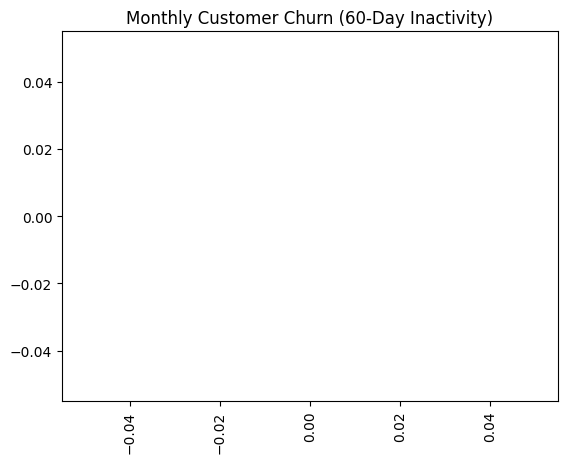

In [24]:
monthly_churn.plot(
    kind='bar',
    title='Monthly Customer Churn (60-Day Inactivity)'
)


IndexError: index 0 is out of bounds for axis 0 with size 0

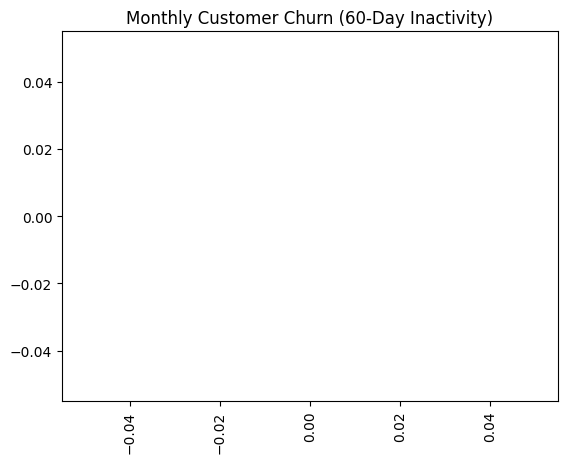

In [25]:
monthly_churn.plot(
    kind='bar',
    title='Monthly Customer Churn (60-Day Inactivity)'
)


In [26]:
print(monthly_churn)


Series([], Freq: M, Name: CustomerID, dtype: int64)


In [27]:
df['Churn'].value_counts()


Churn
False    7
Name: count, dtype: int64

In [28]:
df['Churn'] = df['DaysGap'] > 30


In [29]:
monthly_churn = (
    df[df['Churn']]
    .groupby(df['Date'].dt.to_period('M'))
    .size()
)


<Axes: title={'center': 'Monthly Customer Churn (30-Day Inactivity)'}, xlabel='Date'>

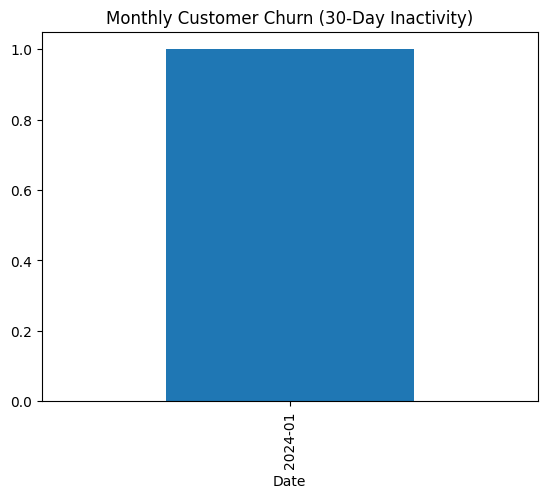

In [30]:
monthly_churn.plot(
    kind='bar',
    title='Monthly Customer Churn (30-Day Inactivity)'
)


In [31]:
df['Month'] = df['Date'].dt.to_period('M')


In [33]:
df.columns


Index(['CustomerID', 'Date', 'Product', 'TotalAmount', 'NextPurchaseDate',
       'DaysGap', 'Churn', 'Month'],
      dtype='object')

In [35]:
monthly_sales = df.groupby('Month')['TotalAmount'].sum()
monthly_sales


Month
2024-01    320
2024-02    180
2024-03    140
Freq: M, Name: TotalAmount, dtype: int64

In [36]:
monthly_churn = df[df['Churn'] == True].groupby('Month').size()
monthly_churn


Month
2024-01    1
Freq: M, dtype: int64

In [37]:
summary = pd.DataFrame({
    'Total Sales': monthly_sales,
    'Churn Customers': monthly_churn
})

summary


,Total Sales,Churn Customers
Month,,
2024-01,320,1.0
2024-02,180,NaN
2024-03,140,NaN


In [38]:
summary = summary.fillna(0)


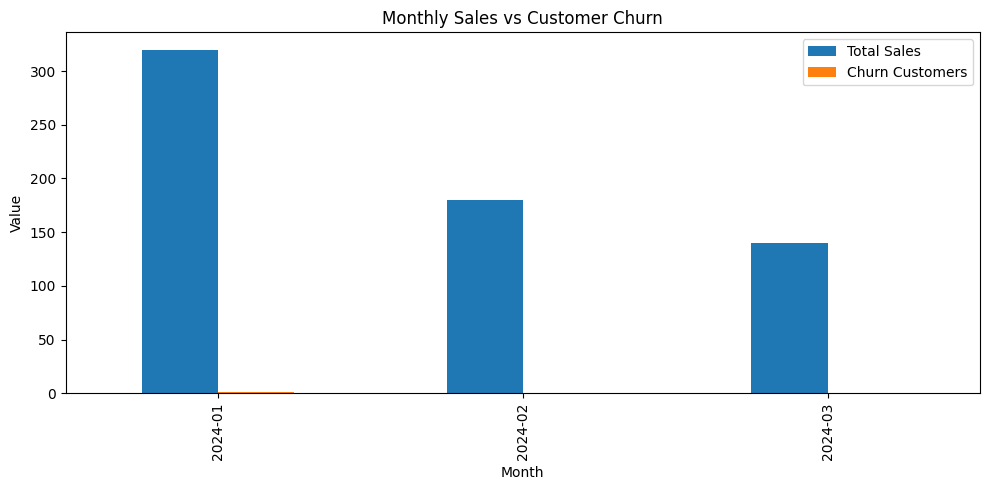

In [39]:
import matplotlib.pyplot as plt

summary.plot(
    kind='bar',
    figsize=(10,5),
    title='Monthly Sales vs Customer Churn'
)

plt.xlabel('Month')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [40]:
monthly_sales
monthly_churn


Month
2024-01    1
Freq: M, dtype: int64

In [41]:
summary = pd.DataFrame({
    'Total Sales': monthly_sales,
    'Churn Customers': monthly_churn
})


In [42]:
summary = summary.fillna(0)
summary


,Total Sales,Churn Customers
Month,,
2024-01,320,1.0
2024-02,180,0.0
2024-03,140,0.0


In [44]:
summary


,Total Sales,Churn Customers
Month,,
2024-01,320,1.0
2024-02,180,0.0
2024-03,140,0.0


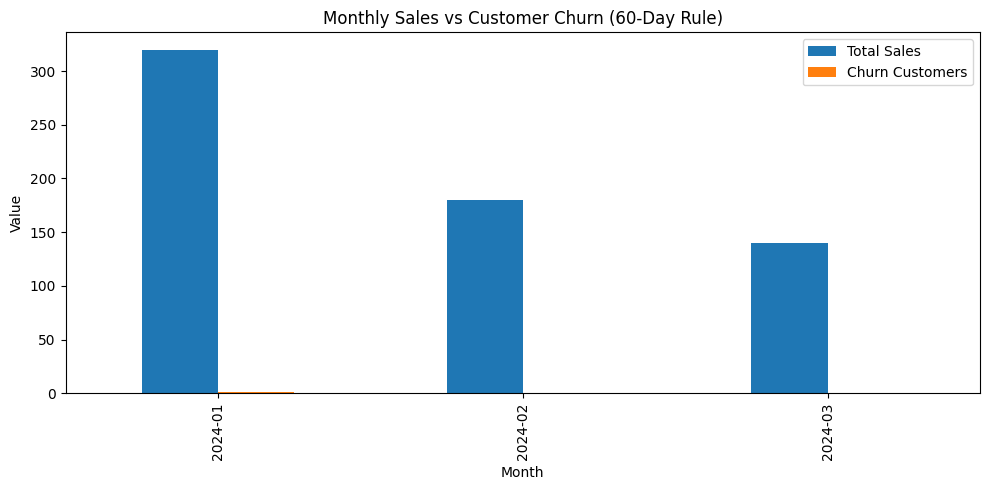

In [45]:
import matplotlib.pyplot as plt

summary.plot(
    kind='bar',
    figsize=(10,5),
    title='Monthly Sales vs Customer Churn (60-Day Rule)'
)

plt.xlabel('Month')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [46]:
purchase_count = df.groupby('CustomerID').size().reset_index(name='PurchaseCount')
purchase_count


,CustomerID,PurchaseCount
0,C001,2
1,C002,2
2,C003,1
3,C004,1
4,C005,1


In [47]:
purchase_count['CustomerType'] = purchase_count['PurchaseCount'].apply(
    lambda x: 'One-time' if x == 1 else 'Repeat'
)

purchase_count


,CustomerID,PurchaseCount,CustomerType
0,C001,2,Repeat
1,C002,2,Repeat
2,C003,1,One-time
3,C004,1,One-time
4,C005,1,One-time


In [48]:
customer_churn = df.groupby('CustomerID')['Churn'].max().reset_index()
customer_churn


,CustomerID,Churn
0,C001,False
1,C002,True
2,C003,False
3,C004,False
4,C005,False


In [49]:
customer_summary = purchase_count.merge(customer_churn, on='CustomerID')
customer_summary


,CustomerID,PurchaseCount,CustomerType,Churn
0,C001,2,Repeat,False
1,C002,2,Repeat,True
2,C003,1,One-time,False
3,C004,1,One-time,False
4,C005,1,One-time,False


In [50]:
churn_by_type = customer_summary.groupby('CustomerType')['Churn'].sum()
churn_by_type


CustomerType
One-time    0
Repeat      1
Name: Churn, dtype: int64

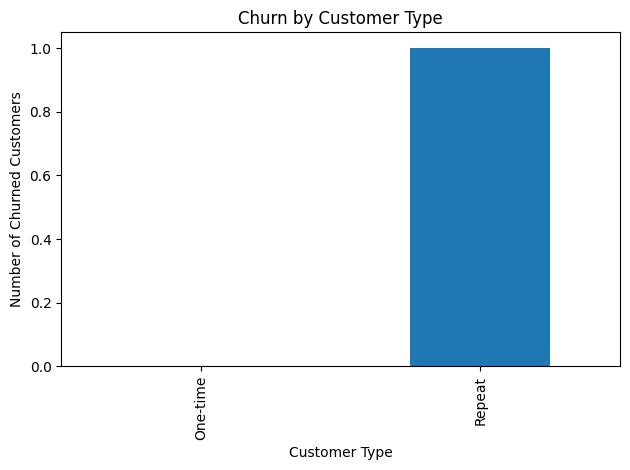

In [51]:
import matplotlib.pyplot as plt

churn_by_type.plot(
    kind='bar',
    title='Churn by Customer Type'
)

plt.xlabel('Customer Type')
plt.ylabel('Number of Churned Customers')
plt.tight_layout()
plt.show()
